<a href="https://colab.research.google.com/github/edwardlqf/Shopify-DS-Internship/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/edwardlqf/Shopify-DS-Internship/main/Data/2019%20Winter%20Data%20Science%20Intern%20Challenge%20Data%20Set%20-%20Sheet1.csv'

In [12]:
df = pd.read_csv(url)
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [91]:
print("The naively calculate average order value (AOV) as described in the problem:")
df["order_amount"].mean()

The naively calculate average order value (AOV) as described in the problem:


3145.128

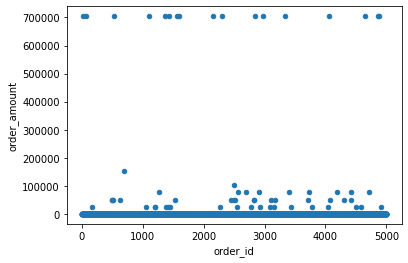

In [92]:
df.plot(x='order_id', y='order_amount', kind='scatter') 
plt.show()

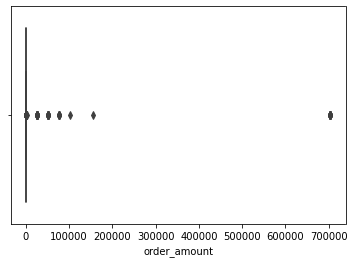

In [93]:
sns.boxplot(x=df['order_amount'])

There seems to be a few rows with similar data of $704000 order value and 2000 items, and they are also all created at 4:00 am on different days. this could be a stock adjustment of some sort between different stores or just inventory adjustment


In [97]:
df[(df['order_amount'] > 100_000)].head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00


So a better way to evaluate this data is to use average item value (AIV), instead of average order value. So we will first create a new column for AIV then we may also need to remove some outliers.

In [99]:
df['AIV'] = df['order_amount'] / df['total_items'] 

In [101]:
df.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,AIV
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01,138.0
6,7,87,915,149,1,cash,2017-03-01 21:37:57,149.0
7,8,22,761,292,2,cash,2017-03-08 2:05:38,146.0
8,9,64,914,266,2,debit,2017-03-17 20:56:50,133.0
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26,146.0


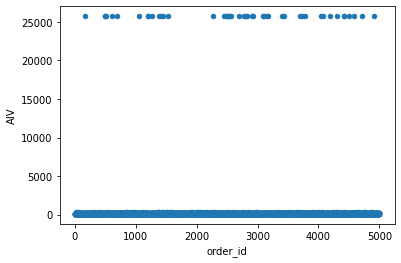

In [103]:
df.plot(x='order_id', y='AIV', kind='scatter') 
plt.show()

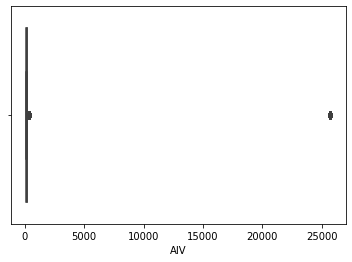

In [104]:
sns.boxplot(x=df['AIV'])

In [116]:
print('The average item value without any filtering is: $', round(df["AIV"].mean(),2))

The average item value without any filtering is: $ 387.74


From the above scatter plot and box plot, we can see some high outliers, so lets try to remove them.

In [109]:
zscore_threshold = 3
df_AIV_date_filtered = df[(np.abs(stats.zscore(df['AIV'])) < zscore_threshold)]

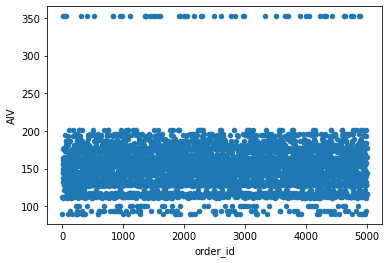

In [110]:
df_AIV_date_filtered.plot(x='order_id', y='AIV', kind='scatter') 
plt.show()

This scatter plot looks pretty good, we can see some data points at around \$350 range, but this makes sense as it's still reasonable for shoes.

In [117]:
print('The average item value, after removing outliers is: $', round(df_AIV_date_filtered["AIV"].mean(),2))

The average item value, after removing outliers is: $ 152.48


Another way to better evaluate AOV could be to remove outliers from the original dataset.

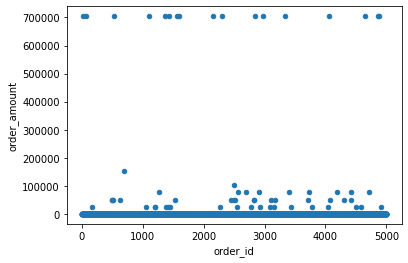

In [38]:
df.plot(x='order_id', y='order_amount', kind='scatter') 
plt.show()

Lets first remove orders over \$10k, as a normal person would probably not spend this much on shoes.

In [61]:
df_under10k = df[(df['order_amount'] < 10_000)]

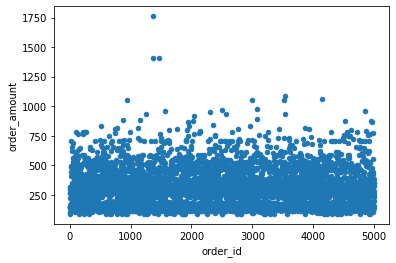

In [63]:
df_under10k.plot(x='order_id', y='order_amount', kind='scatter') 
plt.show()

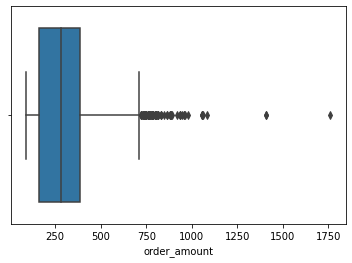

In [64]:
sns.boxplot(x=df_under10k['order_amount'])

In [84]:
round(df_under10k["order_amount"].mean(),2)

302.58

We can see the scatter plot looks okay, and sort of realistic. But when we see the boxplot there are still a lot of outliers past the 3rd quartile.
Now we can make a decision to calculate the AOV (\$302.58) with the current data or choose the filter it even more. I am going to filter it more the  see how the will affect the result.

In [85]:
zscore_threshold = 3

In [86]:
df_under10k[(np.abs(stats.zscore(df_under10k['order_amount'])) >= zscore_threshold)].head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
522,523,46,761,830,5,credit_card,2017-03-26 19:07:51
742,743,12,727,804,4,cash,2017-03-14 16:38:01
771,772,19,818,815,5,debit,2017-03-07 8:48:16
879,880,60,870,885,5,debit,2017-03-27 20:15:11
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45


In [87]:
df_date_filtered = df_under10k[(np.abs(stats.zscore(df_under10k['order_amount'])) < zscore_threshold)]

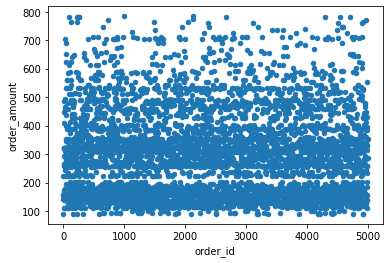

The max order value after filtering is: $ 784


In [88]:
df_date_filtered.plot(x='order_id', y='order_amount', kind='scatter') 
plt.show()
print('The max order value after filtering is: $', df_date_filtered.order_amount.max())

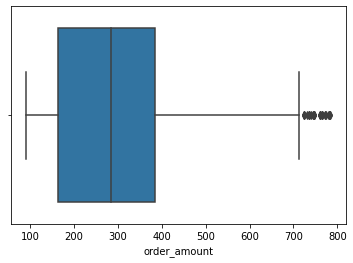

In [89]:
sns.boxplot(x=df_date_filtered['order_amount'])

This plot looks way better with the outliers removed. We can see the max order value is around \$800 which looks more realistic.

In [90]:
print('So we end up with a final average order value of: $', round(df_date_filtered["order_amount"].mean(), 2))

So we end up with a final average order value of: $ 297.06
